# Task 6.5: Unsupervised Machine Learning


## This Notebook contains the following steps;

### Step 1. Importing Libraries

### Step 2. Importing Dataset

### Step 3. Data Quality Checks

### Step 4: Standardizing Dataset

### Step 5. Elbow Technique

### Step 6. K-Means Clustering

### Step 7. The Conclusion


### Step 01: Importing Libraries

      Step 1.1: Importing all necessary and needed libraries
      
      Step 1.2: Running the Matplotlib Inline Command


In [1]:
#Step 1.1: Importing Necessary Libraries; 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import plotly.express as px

In [2]:
#Step 1.2: Running Matplotlib Inline Command;

%matplotlib inline

### Step 02: Importing Dataset

      Step 2.1: Creating a Folderpath for the Dataset
     
      Step 2.2: Importing the Citibike Dataset
      
      Step 2.3: Checking Shape & Dimension
     
      Step 2.4: Running Dataset Head
      

In [3]:
#Step 2.1: Creating a Folderpath for Citibike_Final Dataset; 

path ='/users/ibu/Documents/Bike Rental Analysis'

In [4]:
#Step 2.2: Importing 'Citibike_Final' Dataset from 'Prepared' Data Folder;

df_NYBikes = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'Citibike_T63.csv'), index_col = False)

In [5]:
#Step 2.3: Checking Shape & Dimension; 

df_NYBikes.shape

(50000, 18)

In [6]:
#Step 2.4: Checking Shape & Dimension; 

df_NYBikes.head()

,Unnamed: 0,Bike_ID,Weekday,Start_Hour,Start_Time,Start_Station_ID,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Time,End_Station_ID,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Trip_Duration,Member_Status,Gender,Distance
0,0,16013,Mon,18,9/9/13 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/13 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,Female,High_Latitude
1,1,15230,Thu,18,9/12/13 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/13 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,Male,Mid_Latitude
2,2,17942,Wed,19,9/18/13 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/13 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,Male,High_Latitude
3,3,19683,Sat,11,9/28/13 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/13 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,Female,High_Latitude
4,4,18024,Sat,18,9/7/13 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/13 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,Unknown,High_Latitude



### Step 03: Data Quality Checks


In [8]:
#Step 3.1: Dropping Unnecessary Columns; 

df_NYBikes = df_NYBikes.drop(columns = ['Unnamed: 0'])

In [9]:
#Step 3.2: Querying Dataset Info; 

df_NYBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bike_ID                  50000 non-null  int64  
 1   Weekday                  50000 non-null  object 
 2   Start_Hour               50000 non-null  int64  
 3   Start_Time               50000 non-null  object 
 4   Start_Station_ID         50000 non-null  int64  
 5   Start_Station_Name       50000 non-null  object 
 6   Start_Station_Latitude   50000 non-null  float64
 7   Start_Station_Longitude  50000 non-null  float64
 8   End_Time                 50000 non-null  object 
 9   End_Station_ID           50000 non-null  int64  
 10  End_Station_Name         50000 non-null  object 
 11  End_Station_Latitude     50000 non-null  float64
 12  End_Station_Longitude    50000 non-null  float64
 13  Trip_Duration            50000 non-null  int64  
 14  Member_Status         

In [10]:
#Step 3.3: Confirming Dataframe Shape; 

df_NYBikes.shape

(50000, 17)

In [15]:
#Step 3.4: Checking for Missing Values; 

df_NYBikes.isnull().sum() #No Missing Values Exist

Bike_ID                    0
Weekday                    0
Start_Hour                 0
Start_Time                 0
Start_Station_ID           0
Start_Station_Name         0
Start_Station_Latitude     0
Start_Station_Longitude    0
End_Time                   0
End_Station_ID             0
End_Station_Name           0
End_Station_Latitude       0
End_Station_Longitude      0
Trip_Duration              0
Member_Status              0
Gender                     0
Distance                   0
dtype: int64

In [16]:
#Step 3.5: Checking for Duplicates; 

NYBikes_Dups = df_NYBikes.duplicated()

In [17]:
NYBikes_Dups.shape #No Duplicated Found

(50000,)

In [7]:
df_NYBikes['Start_Hour'].value_counts(dropna = False)

17    5070
18    4871
16    3791
19    3303
8     3284
15    3129
14    3003
13    2979
12    2900
9     2811
11    2277
20    2208
10    2166
7     2043
21    1536
22    1323
23     932
6      911
0      522
1      330
5      208
2      194
3      120
4       89
Name: Start_Hour, dtype: int64

In [19]:
#Step 3.6: Converting Trip Duration from Seconds to Minutes; 

df_NYBikes['Trip_Minutes'] = df_NYBikes['Trip_Duration'] // 60

In [20]:
df_NYBikes

,Bike_ID,Weekday,Start_Hour,Start_Time,Start_Station_ID,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Time,End_Station_ID,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Trip_Duration,Member_Status,Gender,Distance,Trip_Minutes
0,16013,Mon,18,9/9/13 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/13 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,Female,High_Latitude,16
1,15230,Thu,18,9/12/13 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/13 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,Male,Mid_Latitude,9
2,17942,Wed,19,9/18/13 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/13 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,Male,High_Latitude,6
3,19683,Sat,11,9/28/13 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/13 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,Female,High_Latitude,9
4,18024,Sat,18,9/7/13 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/13 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,Unknown,High_Latitude,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,17988,Sat,18,9/21/13 18:39,479,9 Ave & W 45 St,40.760193,-73.991255,9/21/13 20:08,478,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,Unknown,High_Latitude,44
49996,18458,Sat,17,9/14/13 17:32,261,Johnson St & Gold St,40.694749,-73.983625,9/14/13 17:52,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,Female,Low_Latitude,19
49997,15054,Sat,18,9/7/13 18:08,402,Broadway & E 22 St,40.740343,-73.989551,9/7/13 18:25,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,Female,High_Latitude,17
49998,16763,Sat,13,9/7/13 13:25,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,9/7/13 14:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,Unknown,Low_Latitude,44


In [21]:
#Step 3.7: Creating a New Dataframe for Only Numerical values;  

df_bikes = df_NYBikes[['Bike_ID','Start_Hour','Start_Station_ID','End_Station_ID', 'Trip_Minutes']]

In [22]:
df_bikes

,Bike_ID,Start_Hour,Start_Station_ID,End_Station_ID,Trip_Minutes
0,16013,18,523,334,16
1,15230,18,257,236,9
2,17942,19,479,513,6
3,19683,11,527,441,9
4,18024,18,521,476,38
...,...,...,...,...,...
49995,17988,18,479,478,44
49996,18458,17,261,151,19
49997,15054,18,402,524,17
49998,16763,13,271,373,44



### Step 04: Standardizing Dataset


In [23]:
#Step 4.1: Standrdizing the Dataset; 

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_bikes)
print(standardized_data)


[[-0.95635565  0.79308016  0.22346678 -0.30509894  0.26404766]
 [-1.42370933  0.79308016 -0.52255834 -0.58057138 -0.47015809]
 [ 0.19501758  0.99882064  0.10006412  0.19805991 -0.7848177 ]
 ...
 [-1.52875945  0.79308016 -0.11589051  0.22898028  0.36893419]
 [-0.50869887 -0.23562222 -0.48329386 -0.19547215  3.20087066]
 [-0.49019573  1.41030159  0.20102993  0.12778632 -0.7848177 ]]


In [24]:
#Step 4.2: Converting to Dataframe; 

df_bikes = pd.DataFrame(standardized_data, columns=df_bikes.columns)
print(df_bikes)


        Bike_ID  Start_Hour  Start_Station_ID  End_Station_ID  Trip_Minutes
0     -0.956356    0.793080          0.223467       -0.305099      0.264048
1     -1.423709    0.793080         -0.522558       -0.580571     -0.470158
2      0.195018    0.998821          0.100064        0.198060     -0.784818
3      1.234178   -0.647103          0.234685       -0.004328     -0.470158
4      0.243961    0.793080          0.217858        0.094055      2.571551
...         ...         ...               ...             ...           ...
49995  0.222474    0.793080          0.100064        0.099677      3.200871
49996  0.503005    0.587340         -0.511340       -0.819502      0.578707
49997 -1.528759    0.793080         -0.115891        0.228980      0.368934
49998 -0.508699   -0.235622         -0.483294       -0.195472      3.200871
49999 -0.490196    1.410302          0.201030        0.127786     -0.784818

[50000 rows x 5 columns]



### Step 05: Elbow Technique


In [25]:
#Step 5.1: Clustering the Data; 

num_cl = range(1,10) #Defining range of potential clusters in the data

kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.


In [26]:
#Step 5.2: Creating a Score for Given Cluster Variation Option; 

score = [kmeans[i].fit(df_bikes).score(df_bikes) for i in range(len(kmeans))]

score


[-250000.00000000012,
 -205565.25556648843,
 -170430.53353530262,
 -132162.51078755307,
 -107729.51629199415,
 -87959.83398326964,
 -78150.18875186345,
 -73124.4520976402,
 -69295.6327800354]

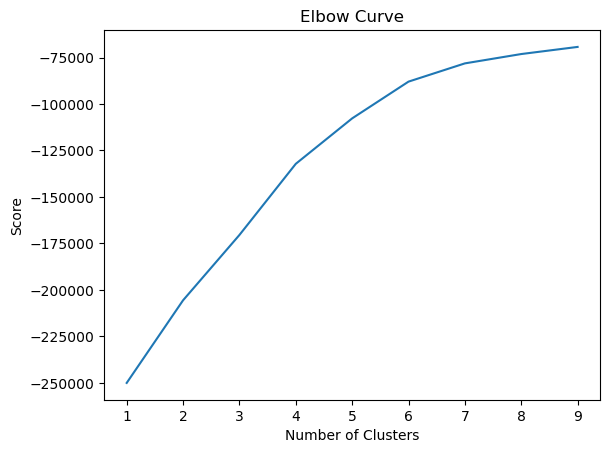

In [27]:
#Step 5.3: Plotting the Elbow Curve Using PyLab; 

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

<b>Notes:</b> The line breaks after count 4. We can therefore say 4 is the optimal count for the cluster.


### Step 06: K-Means Clustering


In [28]:
#Step 6.1: Creating the 'k-means' Object.

kmeans = KMeans(n_clusters = 4) 

In [29]:
#Step 6.2: Fitting the 'k-means' Object to the Data; 

kmeans.fit(df_bikes)

KMeans(n_clusters=4)

In [30]:
df_bikes['clusters'] = kmeans.fit_predict(df_bikes)

In [31]:
df_bikes.head()

,Bike_ID,Start_Hour,Start_Station_ID,End_Station_ID,Trip_Minutes,clusters
0,-0.956356,0.793080,0.223467,-0.305099,0.264048,0
1,-1.423709,0.793080,-0.522558,-0.580571,-0.470158,0
2,0.195018,0.998821,0.100064,0.198060,-0.784818,1
3,1.234178,-0.647103,0.234685,-0.004328,-0.470158,1
4,0.243961,0.793080,0.217858,0.094055,2.571551,1


In [33]:
#Step 6.3: Checking for 'Clusters' Value-Counts; 

df_bikes['clusters'].value_counts()

0    23907
1    22634
2     1804
3     1655
Name: clusters, dtype: int64

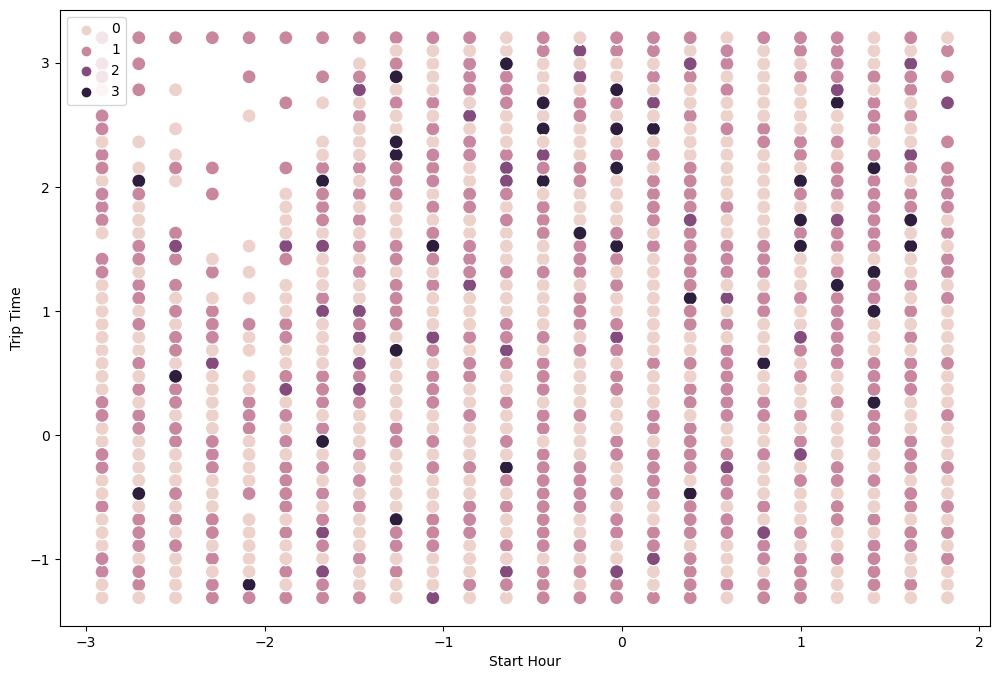

In [41]:
#Step 6.4a: Plotting the Clusters for the "Start_Hour" and "Trip_Minutes" Variables;

plt.figure(figsize=(12,8))

ax = sns.scatterplot(x=df_bikes['Start_Hour'], y=df_bikes['Trip_Minutes'], hue=kmeans.labels_, s=100) 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.

plt.xlabel('Start Hour') # Label x-axis.

plt.ylabel('Trip Time') # Label y-axis.

plt.show()


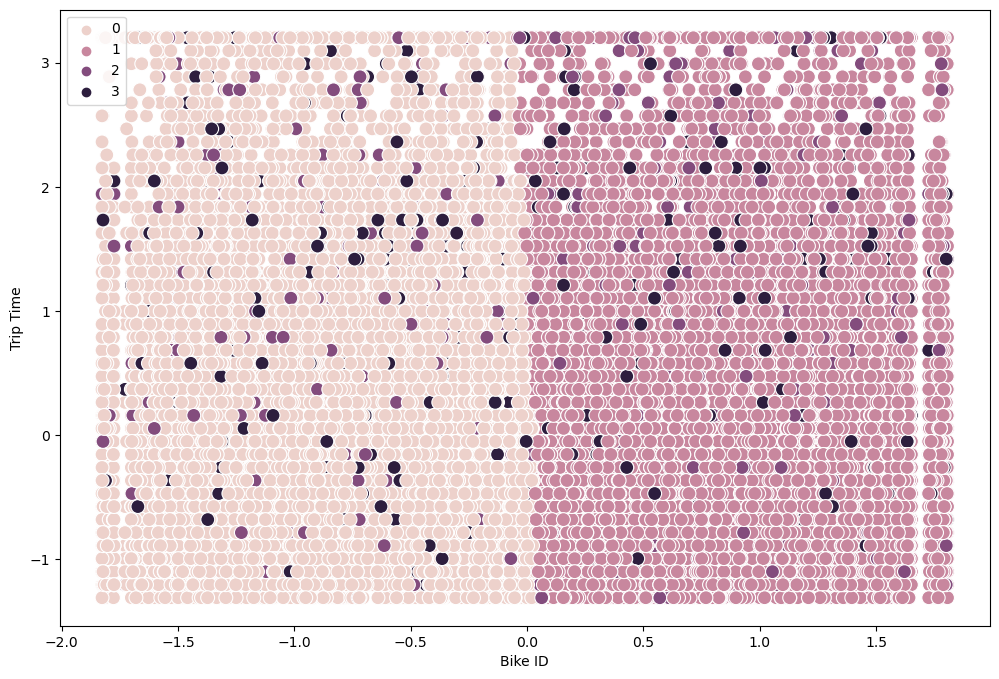

In [35]:
#Step 6.4b: Plotting the Clusters for the "Bike_ID" and "Trip_Minutes" Variables;

plt.figure(figsize=(12,8))

ax = sns.scatterplot(x=df_bikes['Bike_ID'], y=df_bikes['Trip_Minutes'], hue=kmeans.labels_, s=100)

ax.grid(False) 

plt.xlabel('Bike ID') 

plt.ylabel('Trip Time') 

plt.show()

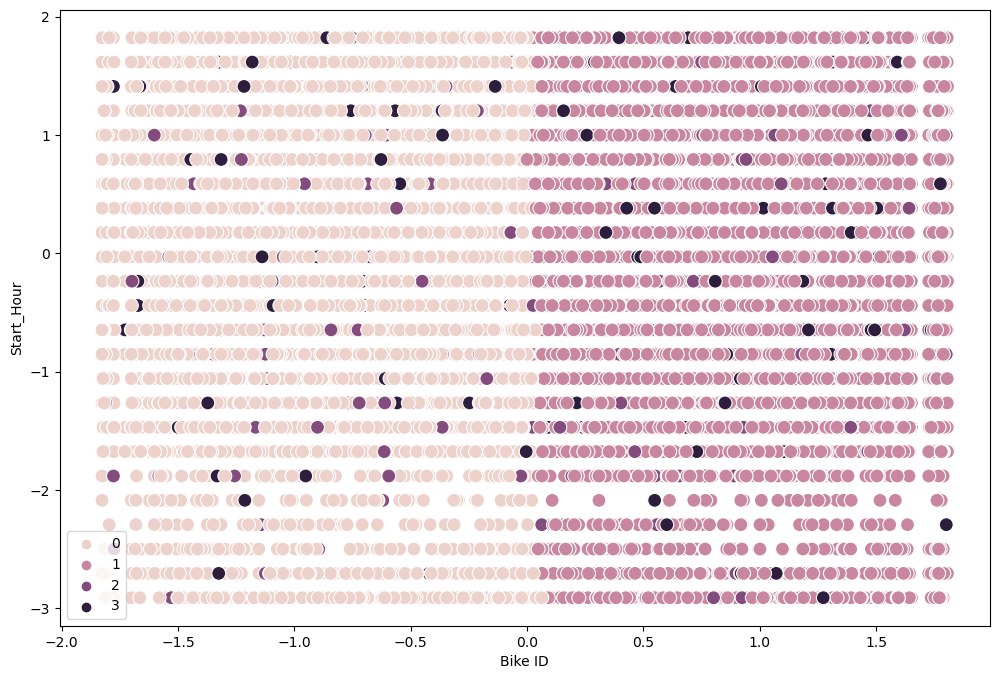

In [37]:
#Step 6.4c: Plotting the Clusters for the "Bike_ID" and "Start_Hour" Variables;

plt.figure(figsize=(12,8))

ax = sns.scatterplot(x=df_bikes['Bike_ID'], y=df_bikes['Start_Hour'], hue=kmeans.labels_, s=100)

ax.grid(False) 

plt.xlabel('Bike ID') 

plt.ylabel('Start_Hour') 

plt.show()

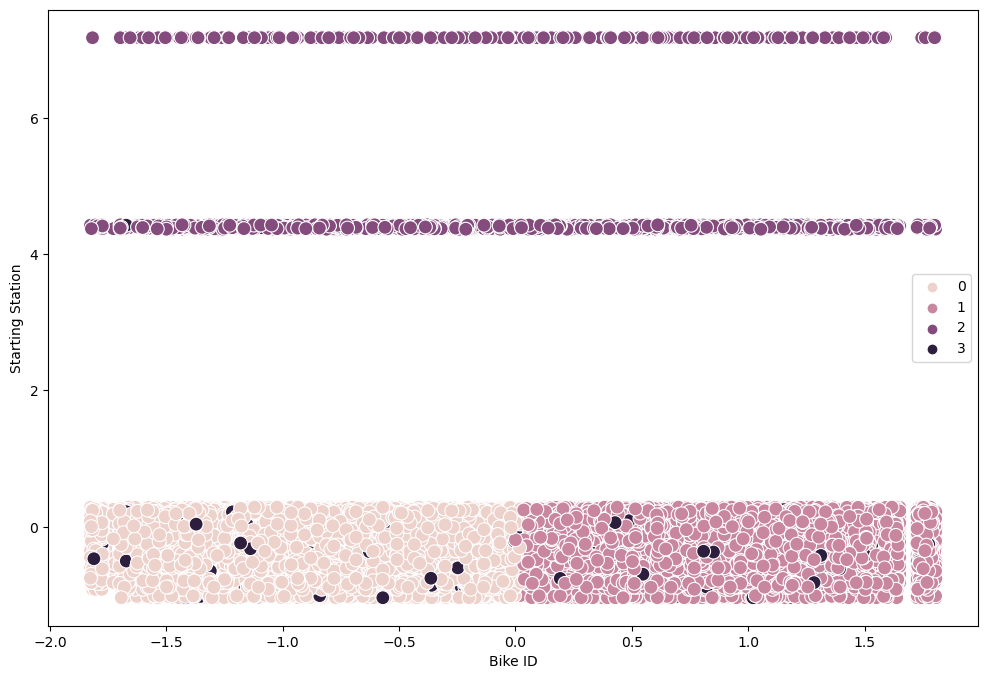

In [46]:
#Step 6.5: Plotting the Clusters for the "Start_Station_ID" and "Trip_Minutes" Variables;

plt.figure(figsize=(12,8))

ax = sns.scatterplot(x=df_bikes['Bike_ID'], y=df_bikes['Start_Station_ID'], hue=kmeans.labels_, s=100)

ax.grid(False) 

plt.xlabel('Bike ID') 

plt.ylabel('Starting Station') 

plt.show()

In [51]:
#Step 6.6: Defining 'Clusters' Colors; 

df_bikes.loc[df_bikes['clusters'] == 3, 'clusters'] = 'Dark Purple'
df_bikes.loc[df_bikes['clusters'] == 2, 'clusters'] = 'Purple'
df_bikes.loc[df_bikes['clusters'] == 1, 'clusters'] = 'Light Purple'
df_bikes.loc[df_bikes['clusters'] == 0, 'clusters'] = 'Dim Purple'


In [52]:
df_bikes.groupby('clusters').agg({'Bike_ID':['mean', 'median'], 
                         'Start_Hour':['mean', 'median'], 
                         'Trip_Minutes':['mean', 'median']})

Bike_ID           Start_Hour           Trip_Minutes          
                  mean    median       mean    median         mean    median
clusters                                                                    
Dark Purple   0.036605  0.035652  -0.006635  0.175859     0.271526 -0.050612
Dim Purple   -0.841269 -0.831609  -0.004667  0.175859    -0.038288 -0.365272
Light Purple  0.883061  0.853968   0.002878  0.175859    -0.006431 -0.260385
Purple        0.035720  0.026102   0.031818  0.175859     0.338992  0.054275


### Step 07: The Conclusion


<b> Looking at these statistics, we can state few facts as follows:

01. The Dark Purple cluster returns a lower 'Start_Hour' mean of -0.0067 compared to cluster Purple which is 0.032 whereas the Dim Purple cluster has a better 'Starting_Hour' compared to the first Dark Purple cluster. 

    
02. The Purple cluster has a higher mean 'Trip_minutes' of 0.34 minutes as well as 'Start_Hour' mean of 0.032 which are better than the Dark Purple cluster in terms of rental time length.


